#### 通过Kmeans为中国的省会城市设置5个核心能源点

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
test_string = "{name:'澳门', geoCoord:[113.54, 22.19]}"

In [4]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [5]:
pattern.findall(test_string)

[('澳门', '113.54', '22.19')]

In [6]:
city_location = {}

In [8]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info:
        continue

    city_name, long_, lat = city_info[0]
    long_, lat = float(long_), float(lat)

    city_location[city_name] = [long_, lat]

In [9]:
city_location

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '西藏': [91.11, 29.97],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

#### 常用距离
- 球面地理距离: Geo Distance
- 余弦距离: Cosine Distance
- 欧式距离: Euclidean Distance
- 曼哈顿距离: Manhattan Distance

In [10]:
import math


def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [12]:
geo_distance(city_location['武汉'], city_location['长沙'])

286.51162187947006

In [22]:
from pylab import mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = 'FangSong'
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [14]:
import networkx as nx

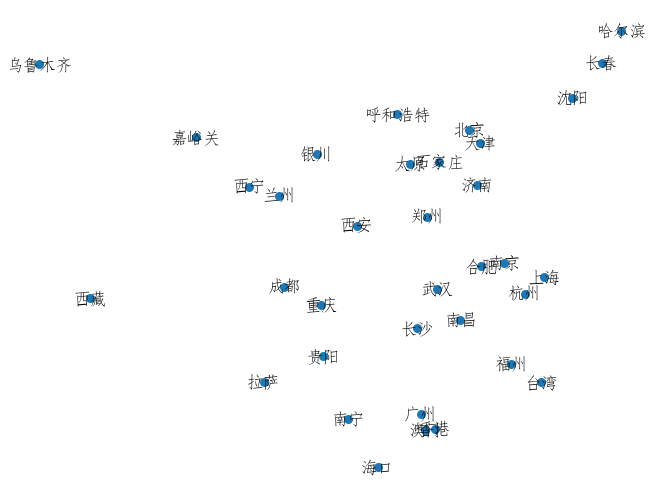

In [15]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [16]:
import numpy as np

In [17]:
Xs = np.array(list(city_location.values()))

- features

In [18]:
Xs.shape

(35, 2)

In [20]:
import random
from collections import defaultdict


def get_random_center(all_x, all_y):
    return random.uniform(min(all_x), max(all_x)), random.uniform(min(all_y), max(all_y))

all_x = Xs[:, 0]
all_y = Xs[:, 1]

K = 5
threshold = 3

centers = {'{}'.format(i + 1): get_random_center(all_x, all_y) for i in range(K)}
the_first_centers = {k: v for k, v in centers.items()}

changed = True

while changed:
    closet_points = defaultdict(list)

    for x, y in zip(all_x, all_y):
        closet_c, closet_dis = min([(k, geo_distance((x, y), centers[k])) for k in centers], key=lambda t: t[1])
        closet_points[closet_c].append([x, y])
    
    changed = False

    for c in closet_points:
        former_center = centers[c]
        neighbors_belong_to_c = closet_points[c]
        neighbors_center = np.mean(neighbors_belong_to_c, axis=0)

        if geo_distance(neighbors_center, former_center) > threshold:
            print('Updated: {} center'.format(c))
            centers[c] = neighbors_center
            changed = True

Updated: 1 center
Updated: 2 center
Updated: 5 center
Updated: 4 center
Updated: 3 center
Updated: 5 center
Updated: 4 center
Updated: 3 center
Updated: 5 center
Updated: 4 center


In [21]:
centers

{'1': array([104.754,  29.58 ]),
 '2': array([94.675 , 37.4425]),
 '3': array([114.34555556,  24.27666667]),
 '4': array([121.804,  42.096]),
 '5': array([114.71333333,  34.73083333])}

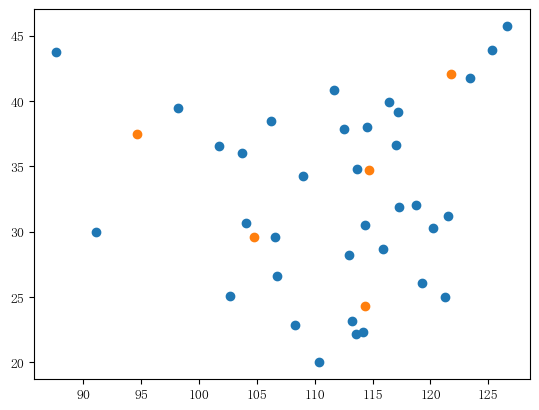

In [24]:
plt.scatter(*[all_x, all_y])
plt.scatter(*zip(*centers.values()))

In [27]:
city_location_with_station = {'能源站-{}'.format(int(i)): position for i, position in centers.items()}

In [28]:
city_location_with_station

{'能源站-1': array([104.754,  29.58 ]),
 '能源站-2': array([94.675 , 37.4425]),
 '能源站-3': array([114.34555556,  24.27666667]),
 '能源站-4': array([121.804,  42.096]),
 '能源站-5': array([114.71333333,  34.73083333])}

In [29]:
def draw_cities(cities, color=None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph, cities, node_color=color, with_labels=True, node_size=50)

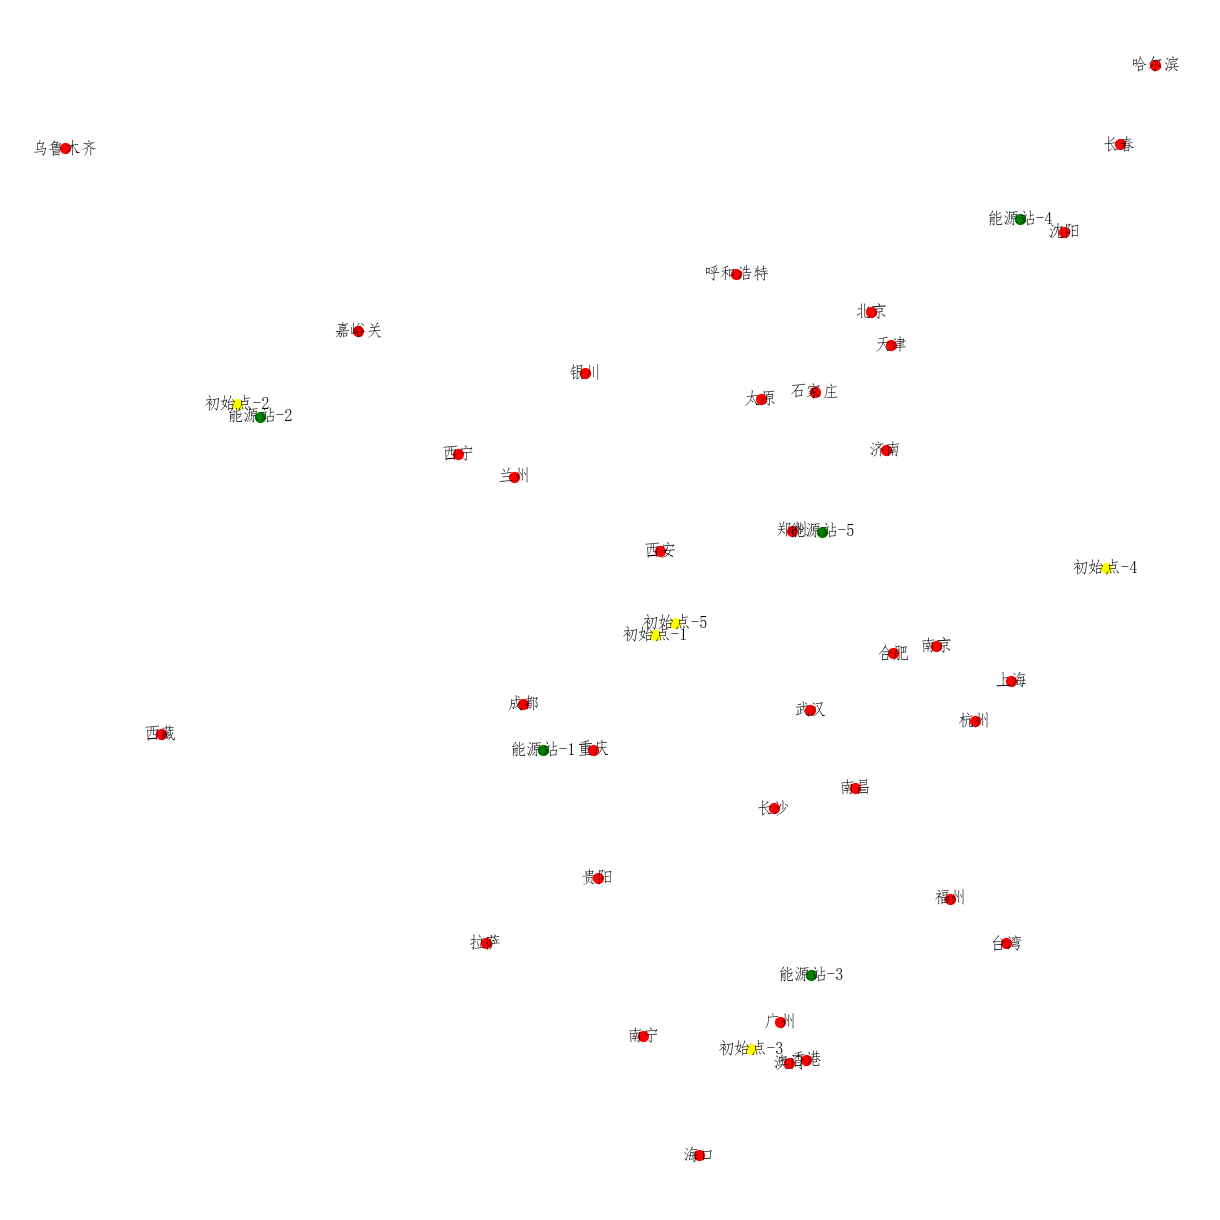

In [30]:
plt.figure(1, figsize=(12, 12))
draw_cities({'初始点-{}'.format(int(i)): p for i, p in the_first_centers.items()}, color='yellow')
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')

In [31]:
from sklearn.cluster import KMeans

In [32]:
result = KMeans(n_clusters=5, random_state=0).fit(Xs)

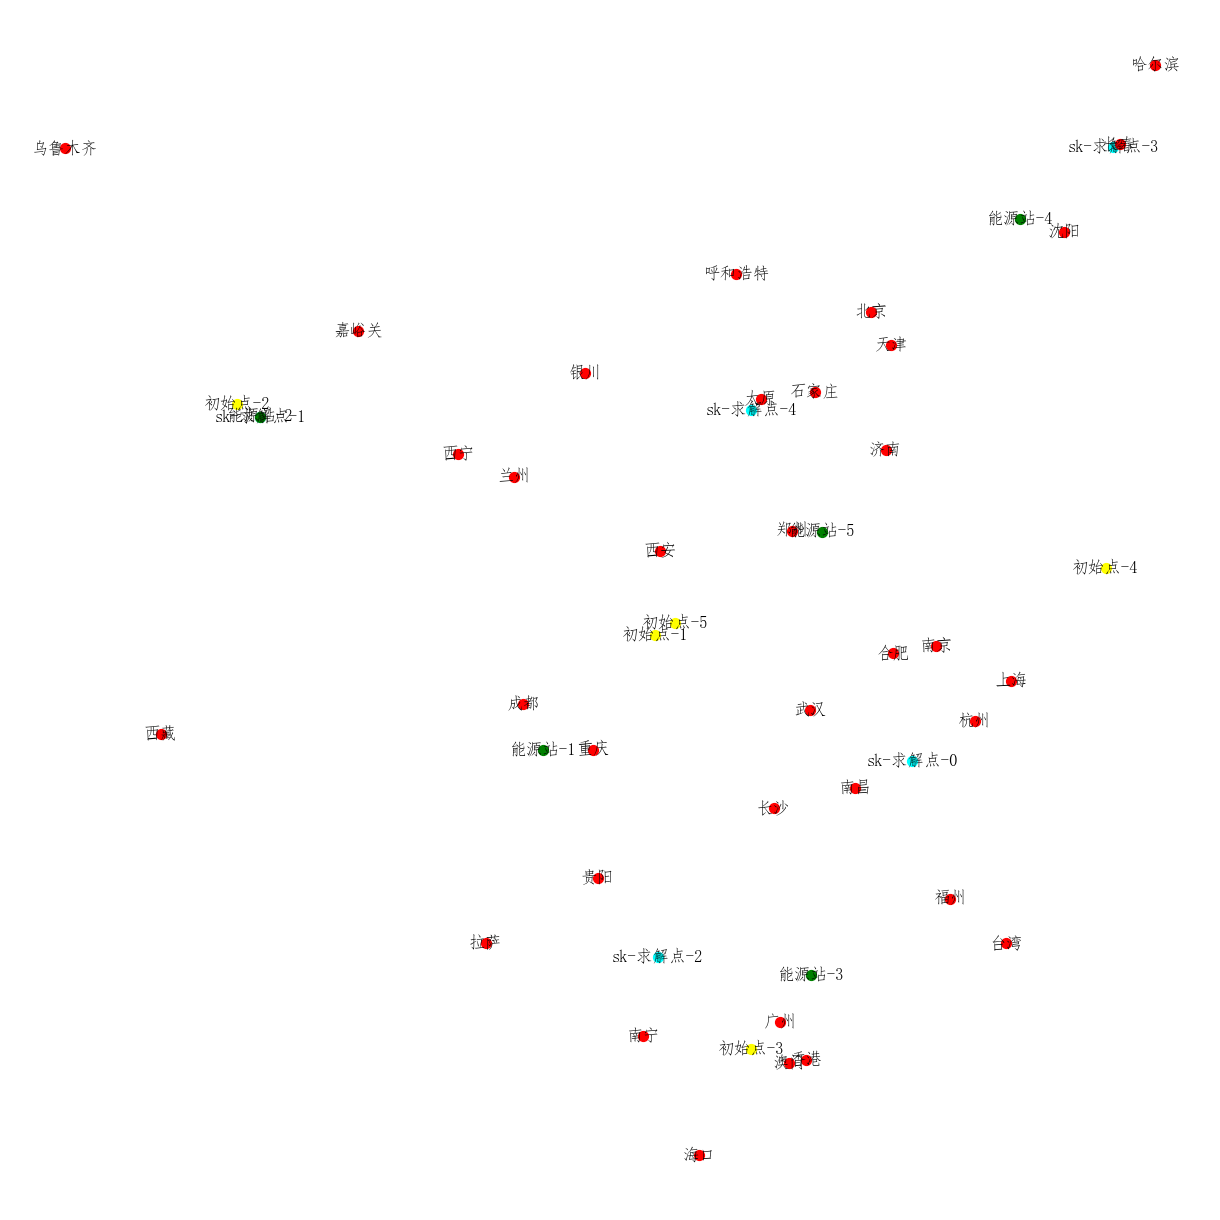

In [33]:
plt.figure(1, figsize=(12, 12))
draw_cities({'初始点-{}'.format(int(i)): p for i, p in the_first_centers.items()}, color='yellow')
draw_cities({'sk-求解点-{}'.format(int(i)): p for i, p in enumerate(result.cluster_centers_)}, color='cyan')
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')